In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import datetime

In [3]:
import os
os.chdir('/content/drive/MyDrive/f1pro')
os.listdir()

['constructor_results.csv',
 'circuits.csv',
 'driver_standings.csv',
 'lap_times.csv',
 'results.csv',
 'constructors.csv',
 'pit_stops.csv',
 'seasons.csv',
 'qualifying.csv',
 'status.csv',
 'constructor_standings.csv',
 'sprint_results.csv',
 'drivers.csv',
 'races.csv']

In [4]:
# results = "results.csv"
# df_results = pd.read_csv(results)
# print(df_results)

In [5]:
# laptimes  = "lap_times.csv"
# df_laptimes = pd.read_csv(laptimes)
# print(df_laptimes)

In [6]:
# cr = "constructor_results.csv"
# df_cr = pd.read_csv(cr)
# print(df_cr)

In [7]:
# circuits = "circuits.csv"
# df_circuits = pd.read_csv(circuits)
# print(df_circuits)

In [8]:
df_drivers = "drivers.csv"
drivers = pd.read_csv(df_drivers)
df_races = "races.csv"
races = pd.read_csv(df_races)
df_results = "results.csv"
results = pd.read_csv(df_results)
df_sprint = "sprint_results.csv"
sprint = pd.read_csv(df_sprint)
df_lap_times = "lap_times.csv"
lap_times = pd.read_csv(df_lap_times)
df_circuits = "circuits.csv"
circuits = pd.read_csv(df_circuits)
df_status = "status.csv"
status = pd.read_csv(df_status)
df_constructors = 'constructors.csv'
constructors = pd.read_csv(df_constructors)

In [9]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher


In [10]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25655,25661,1086,825,210,20,13,16,16,16,0.0,69,\N,\N,37,15,1:23.511,188.856,11
25656,25662,1086,848,3,23,17,17,17,17,0.0,69,\N,\N,43,12,1:23.047,189.911,11
25657,25663,1086,849,3,6,19,18,18,18,0.0,69,\N,\N,60,8,1:22.478,191.221,11
25658,25664,1086,852,213,22,16,19,19,19,0.0,68,\N,\N,58,16,1:23.538,188.795,12


In [11]:
races_2021 = races[races['year']==2021]
races_2021 = races_2021.merge(results, left_on='raceId', right_on='raceId', how='inner')
races_2021 = races_2021.merge(drivers, left_on='driverId', right_on='driverId', how='inner')

In [12]:
sprint = sprint[['raceId','driverId','points']]
sprint = sprint.rename(columns={
    'points': 'sprint_points'
})

In [13]:
sprint

,raceId,driverId,sprint_points
0,1061,830,3
1,1061,1,2
2,1061,822,1
3,1061,844,0
4,1061,846,0
...,...,...,...
95,1084,848,0
96,1084,852,0
97,1084,849,0
98,1084,20,0


In [14]:
races_2021 = pd.merge(races_2021, sprint, on=['raceId', 'driverId'], how='left')
races_2021['sprint_points'] = races_2021['sprint_points'].apply(lambda x: 0 if (x!=0 and x!=1 and x!=2 and x!=3) else x)
races_2021['sprint_points'].apply(lambda x: x)
races_2021['total_points'] = races_2021['points'] + races_2021['sprint_points']

In [15]:
races_2021

,raceId,year,round,circuitId,name,date,time_x,url_x,fp1_date,fp1_time,...,driverRef,number_y,code,forename,surname,dob,nationality,url_y,sprint_points,total_points
0,1053,2021,2,21,Emilia Romagna Grand Prix,2021-04-18,13:00:00,http://en.wikipedia.org/wiki/2021_Emilia_Romag...,2021-04-16,\N,...,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,0.0,25.0
1,1052,2021,1,3,Bahrain Grand Prix,2021-03-28,15:00:00,http://en.wikipedia.org/wiki/2021_Bahrain_Gran...,2021-03-26,\N,...,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,0.0,18.0
2,1051,2021,20,78,Qatar Grand Prix,2021-11-21,14:00:00,http://en.wikipedia.org/wiki/2021_Qatar_Grand_...,2021-11-19,\N,...,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,0.0,19.0
3,1054,2021,3,75,Portuguese Grand Prix,2021-05-02,14:00:00,http://en.wikipedia.org/wiki/2021_Portuguese_G...,2021-04-30,\N,...,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,0.0,18.0
4,1055,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...,2021-05-07,\N,...,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,0.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1071,2021,19,18,São Paulo Grand Prix,2021-11-14,17:00:00,http://en.wikipedia.org/wiki/2021_S%C3%A3o_Pau...,2021-11-12,\N,...,latifi,6,LAT,Nicholas,Latifi,1995-06-29,Canadian,http://en.wikipedia.org/wiki/Nicholas_Latifi,0.0,0.0
436,1072,2021,21,77,Saudi Arabian Grand Prix,2021-12-05,17:30:00,http://en.wikipedia.org/wiki/2021_Saudi_Arabia...,2021-12-03,\N,...,latifi,6,LAT,Nicholas,Latifi,1995-06-29,Canadian,http://en.wikipedia.org/wiki/Nicholas_Latifi,0.0,0.0
437,1073,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,13:00:00,http://en.wikipedia.org/wiki/2021_Abu_Dhabi_Gr...,2021-12-10,\N,...,latifi,6,LAT,Nicholas,Latifi,1995-06-29,Canadian,http://en.wikipedia.org/wiki/Nicholas_Latifi,0.0,0.0
438,1064,2021,13,39,Dutch Grand Prix,2021-09-05,13:00:00,http://en.wikipedia.org/wiki/2021_Dutch_Grand_...,2021-09-03,\N,...,kubica,88,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica,0.0,0.0


In [16]:
ver = races_2021[races_2021['code'] == 'VER']
ham = races_2021[races_2021['code'] == 'HAM']
vet =races_2021[races_2021['code'] == 'VET']
per = races_2021[races_2021['code'] == 'PER']
bot = races_2021[races_2021['code'] == 'BOT']
sai = races_2021[races_2021['code'] == 'SAI']
nor = races_2021[races_2021['code'] == 'NOR']
lec = races_2021[races_2021['code'] == 'LEC']
ric = races_2021[races_2021['code'] == 'RIC']
gas = races_2021[races_2021['code'] == 'GAS']
alo = races_2021[races_2021['code'] == 'ALO']
oco = races_2021[races_2021['code'] == 'OCO']
STR = races_2021[races_2021['code'] == 'STR']
tsu = races_2021[races_2021['code'] == 'TSU']
rus = races_2021[races_2021['code'] == 'RUS']
rai = races_2021[races_2021['code'] == 'RAI']
lat = races_2021[races_2021['code'] == 'LAT']
gio = races_2021[races_2021['code'] == 'GIO']
sch = races_2021[races_2021['code'] == 'SCH']
maz = races_2021[races_2021['code'] == 'MAZ']
kub = races_2021[races_2021['code'] == 'KUB']

In [17]:
def cumulative_points(data):
    total_points = []
    cumulative = 0
    data.sort_values(by='date', inplace=True)
    for x in data['total_points']:
        cumulative += x
        total_points.append(cumulative)
    return total_points
        
total_points_ver = cumulative_points(ver)
total_points_ham = cumulative_points(ham)
total_points_vet = cumulative_points(vet)
total_points_per = cumulative_points(per)
total_points_bot = cumulative_points(bot)
total_points_sai = cumulative_points(sai)
total_points_nor = cumulative_points(nor)
total_points_lec = cumulative_points(lec)
total_points_ric = cumulative_points(ric)
total_points_gas = cumulative_points(gas)
total_points_alo = cumulative_points(alo)
total_points_oco = cumulative_points(oco)
total_points_STR = cumulative_points(STR)
total_points_tsu = cumulative_points(tsu)
total_points_rus = cumulative_points(rus)
total_points_rai = cumulative_points(rai)
total_points_lat = cumulative_points(lat)
total_points_gio = cumulative_points(gio)
total_points_sch = cumulative_points(sch)
total_points_maz = cumulative_points(maz)
total_points_kub = cumulative_points(kub)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


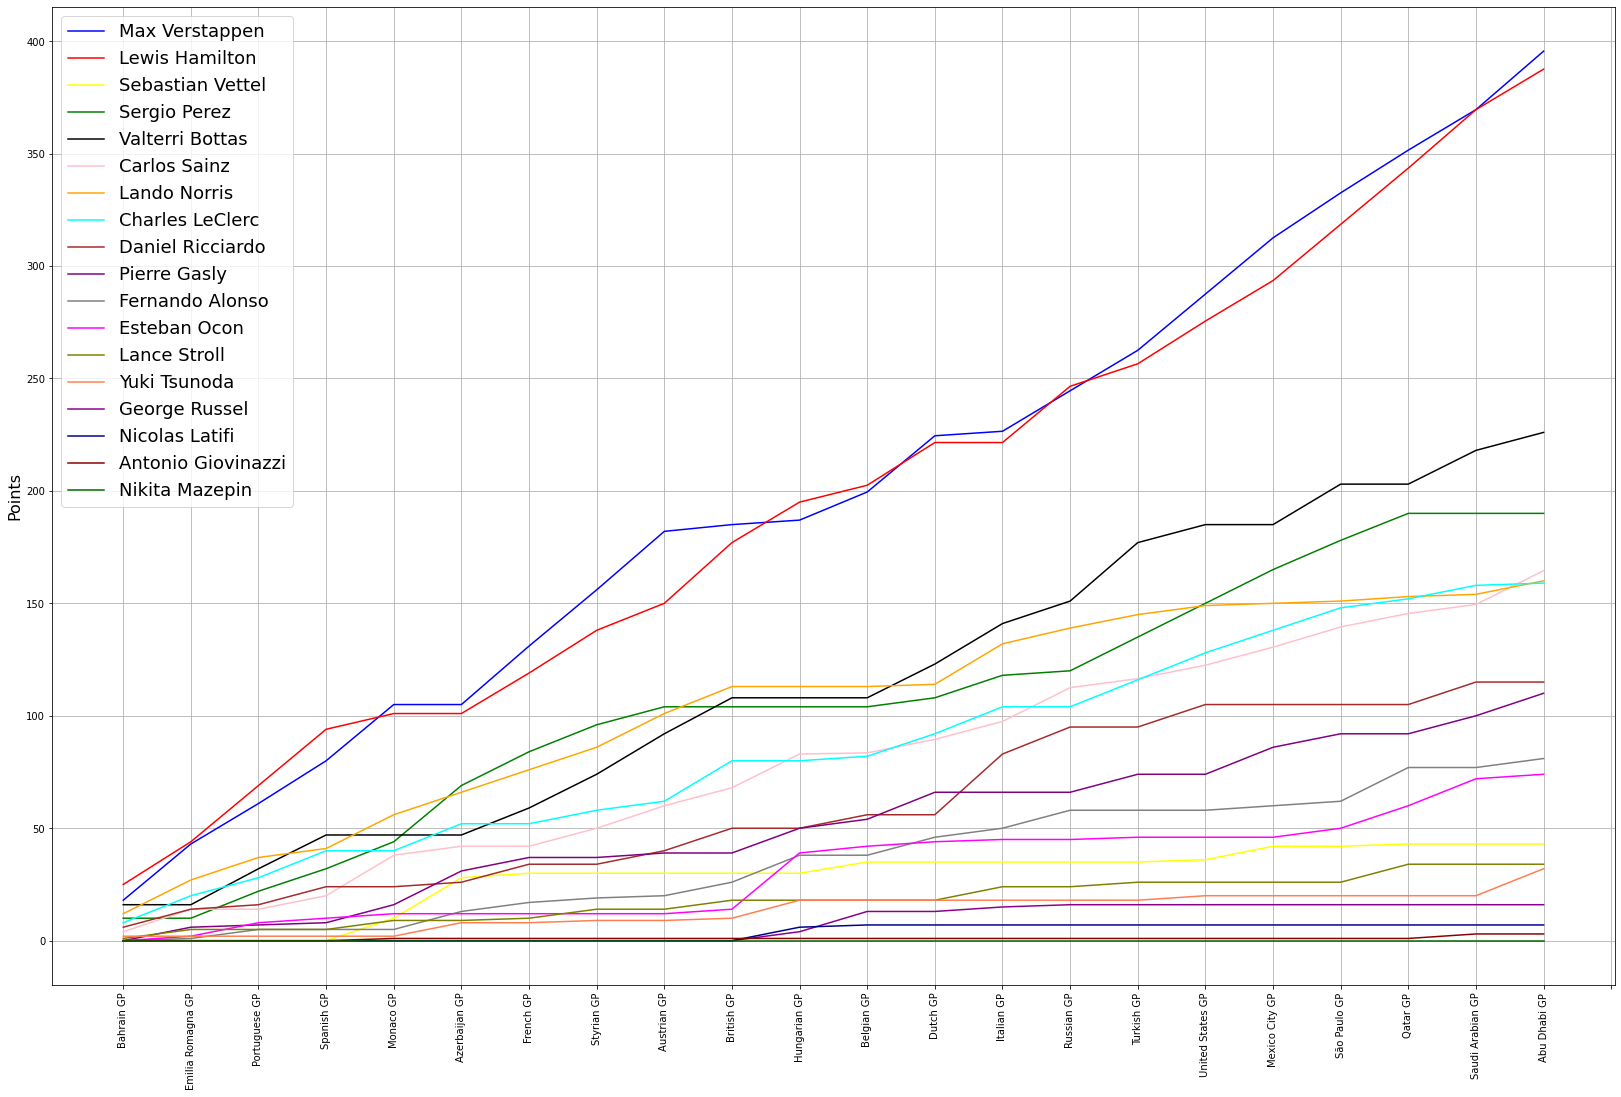

<Figure size 432x288 with 0 Axes>

In [18]:
names = []
for x in ver['name']:
    names.append(x.replace('Grand Prix', 'GP'))
    
plt.figure(figsize=(28,18))
plt.plot(names, total_points_ver, label='Max Verstappen', color='blue')
plt.plot(names, total_points_ham, label='Lewis Hamilton', color='red')
plt.plot(names, total_points_vet, label='Sebastian Vettel', color='yellow')
plt.plot(names, total_points_per, label='Sergio Perez', color='green')
plt.plot(names, total_points_bot, label='Valterri Bottas', color='black')
plt.plot(names, total_points_sai, label='Carlos Sainz', color='pink')
plt.plot(names, total_points_nor, label='Lando Norris', color='orange')
plt.plot(names, total_points_lec, label='Charles LeClerc', color='cyan')
plt.plot(names, total_points_ric, label='Daniel Ricciardo', color='brown')
plt.plot(names, total_points_gas, label='Pierre Gasly', color='purple')
plt.plot(names, total_points_alo, label='Fernando Alonso', color='gray')
plt.plot(names, total_points_oco, label='Esteban Ocon', color='magenta')
plt.plot(names, total_points_STR, label='Lance Stroll', color='olive')
plt.plot(names, total_points_tsu, label='Yuki Tsunoda', color='coral')
plt.plot(names, total_points_rus, label='George Russel', color='darkmagenta')

# plt.plot(names, total_points_rai, label='Kimi Raikkonen', color='pink')
plt.plot(names, total_points_lat, label='Nicolas Latifi', color='darkblue')
plt.plot(names, total_points_gio, label='Antonio Giovinazzi', color='darkred')
# plt.plot(names, total_points_sch, label='Mick Schumacher', color='pink')
plt.plot(names, total_points_maz, label='Nikita Mazepin', color='darkgreen')



plt.ylabel('Points', fontsize=16)
plt.xticks(range(0,23))
plt.xticks(rotation=90)
plt.legend(fontsize = 18)
plt.grid()
plt.show()
plt.clf()

In [19]:
lap_times = pd.merge(lap_times, drivers, on='driverId', how='left')
lap_times = pd.merge(lap_times, races, on='raceId', how='left')
lap_times_2021 = lap_times[lap_times['year'] == 2021]
lap_times_2021['timedelta'] = lap_times_2021['time_x'].apply(lambda x: float(x.split(':')[0])*60+float(x.split(':')[1]))

<ipython-input-19-5bb297faa81d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lap_times_2021['timedelta'] = lap_times_2021['time_x'].apply(lambda x: float(x.split(':')[0])*60+float(x.split(':')[1]))


In [20]:
lap_times_2021
# tired quality/performance

,raceId,driverId,lap,position,time_x,milliseconds,driverRef,number,code,forename,...,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,timedelta
490904,1052,830,1,1,1:58.245,118245,max_verstappen,33,VER,Max,...,\N,2021-03-26,\N,2021-03-27,\N,2021-03-27,\N,\N,\N,118.245
490905,1052,830,2,1,2:22.406,142406,max_verstappen,33,VER,Max,...,\N,2021-03-26,\N,2021-03-27,\N,2021-03-27,\N,\N,\N,142.406
490906,1052,830,3,1,2:38.001,158001,max_verstappen,33,VER,Max,...,\N,2021-03-26,\N,2021-03-27,\N,2021-03-27,\N,\N,\N,158.001
490907,1052,830,4,1,1:44.343,104343,max_verstappen,33,VER,Max,...,\N,2021-03-26,\N,2021-03-27,\N,2021-03-27,\N,\N,\N,104.343
490908,1052,830,5,1,1:44.629,104629,max_verstappen,33,VER,Max,...,\N,2021-03-26,\N,2021-03-27,\N,2021-03-27,\N,\N,\N,104.629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514587,1073,847,22,15,1:30.821,90821,russell,63,RUS,George,...,\N,2021-12-10,\N,2021-12-11,\N,2021-12-11,\N,\N,\N,90.821
514588,1073,847,23,15,1:30.647,90647,russell,63,RUS,George,...,\N,2021-12-10,\N,2021-12-11,\N,2021-12-11,\N,\N,\N,90.647
514589,1073,847,24,14,1:31.577,91577,russell,63,RUS,George,...,\N,2021-12-10,\N,2021-12-11,\N,2021-12-11,\N,\N,\N,91.577
514590,1073,847,25,16,1:32.794,92794,russell,63,RUS,George,...,\N,2021-12-10,\N,2021-12-11,\N,2021-12-11,\N,\N,\N,92.794


In [21]:
def cumulative_time(data):
    cumulative = 0
    diff = 0
    total_time = []
    total_diff = []
    
    for x in data['timedelta']:
        cumulative+=x
        total_time.append(cumulative)
    
    if len(vet_lap)<len(total_time):
        for x in range(len(vet_lap),len(total_time)):
            total_time.remove(total_time[-1])
            
    
    for i in range(len(total_time)):
        diff = vet_lap[i]-total_time[i]
        total_diff.append(diff)
        
    if len(total_diff)<len(vet_lap):
        for x in range(len(total_diff),len(vet_lap)):
            total_diff.append(np.nan)
        
    return total_diff

In [22]:
brit = lap_times_2021[lap_times_2021['name'] == 'British Grand Prix']
cumulative = 0
vet_lap=[]

for x in brit[brit['code']=='VET']['timedelta']:
    cumulative+=x
    vet_lap.append(cumulative)

diff = pd.DataFrame()
diff['BOT'] = cumulative_time(brit[brit['code']=='BOT'])
diff['HAM'] = cumulative_time(brit[brit['code']=='VET'])
diff['VER'] = cumulative_time(brit[brit['code']=='VER'])
diff['PER'] = cumulative_time(brit[brit['code']=='PER'])
diff['LEC'] = cumulative_time(brit[brit['code']=='LEC'])
diff['SAI'] = cumulative_time(brit[brit['code']=='SAI'])
diff['NOR'] = cumulative_time(brit[brit['code']=='NOR'])
diff['RIC'] = cumulative_time(brit[brit['code']=='RIC'])
diff['ALO'] = cumulative_time(brit[brit['code']=='ALO'])
diff['OCO'] = cumulative_time(brit[brit['code']=='OCO'])
diff['MSC'] = cumulative_time(brit[brit['code']=='MSC'])
diff['MAZ'] = cumulative_time(brit[brit['code']=='MAZ'])
diff['STR'] = cumulative_time(brit[brit['code']=='STR'])
diff['RAI'] = cumulative_time(brit[brit['code']=='RAI'])
diff['GIO'] = cumulative_time(brit[brit['code']=='GIO'])
diff['GAS'] = cumulative_time(brit[brit['code']=='GAS'])
diff['TSU'] = cumulative_time(brit[brit['code']=='TSU'])
diff['RUS'] = cumulative_time(brit[brit['code']=='RUS'])
diff['LAT'] = cumulative_time(brit[brit['code']=='LAT'])

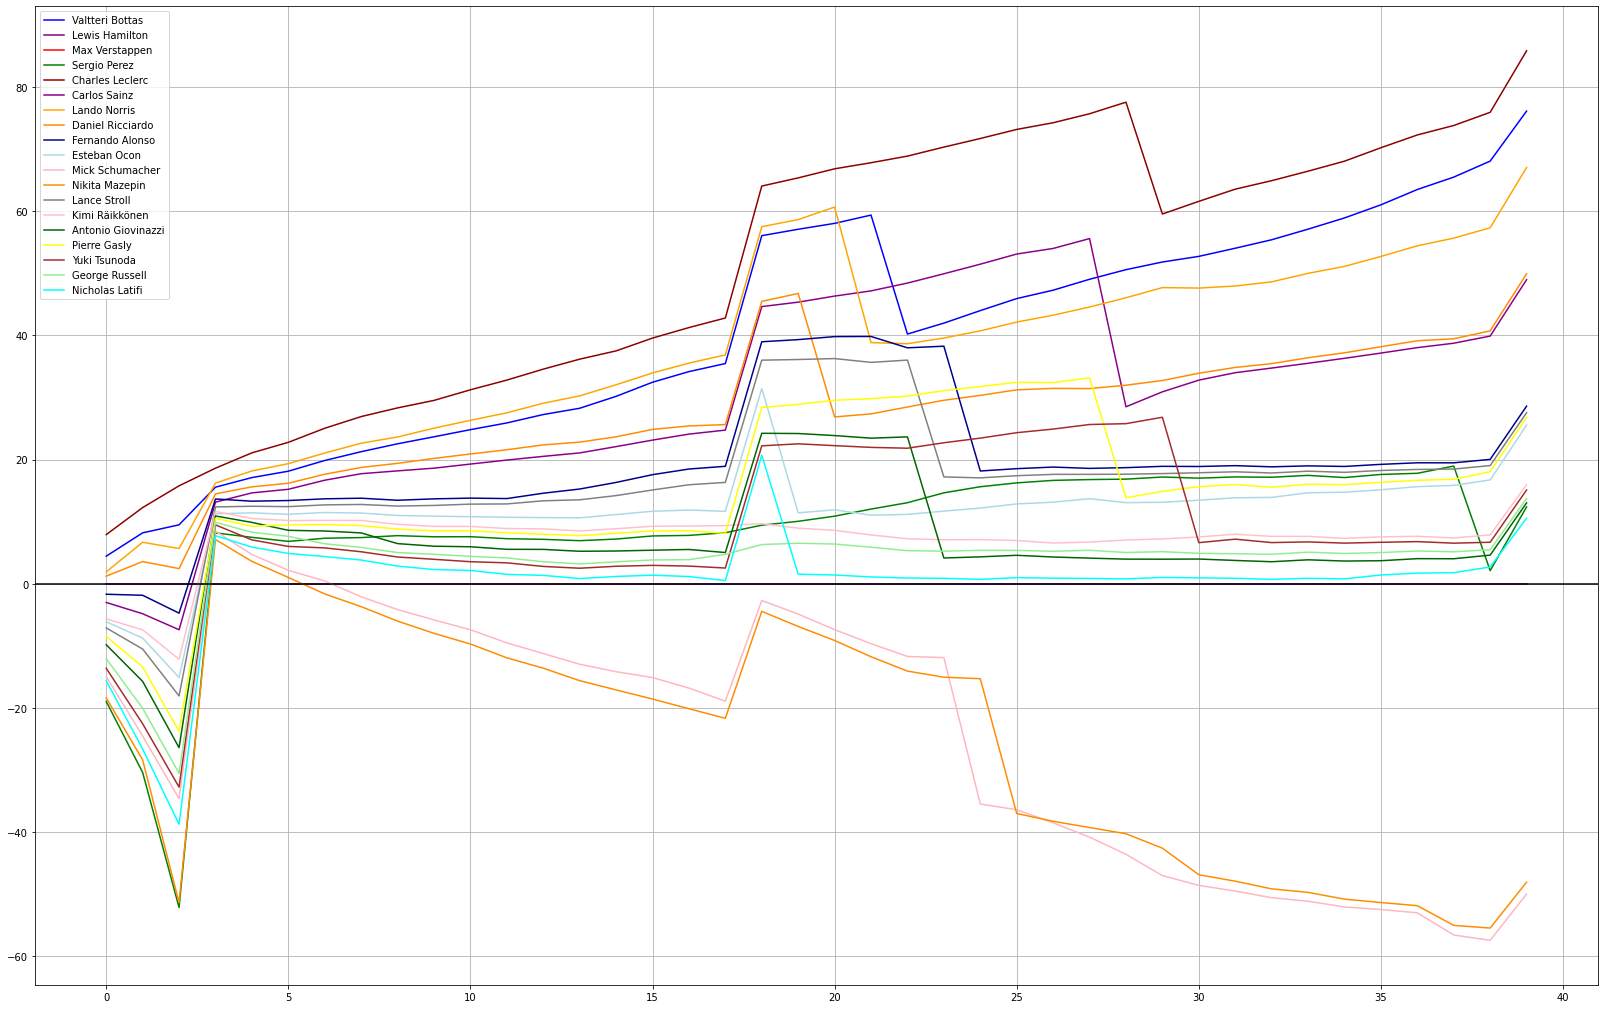

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(28,18))
plt.plot(diff['BOT'], color='blue', label='Valtteri Bottas')
plt.plot(diff['HAM'], color='purple', label='Lewis Hamilton')
plt.plot(diff['VER'], color='red', label='Max Verstappen')
plt.plot(diff['PER'], color='green', label='Sergio Perez')
plt.plot(diff['LEC'], color='darkred', label='Charles Leclerc')
plt.plot(diff['SAI'], color='darkmagenta', label='Carlos Sainz')
plt.plot(diff['NOR'], color='orange', label='Lando Norris')
plt.plot(diff['RIC'], color='darkorange', label='Daniel Ricciardo')
plt.plot(diff['ALO'], color='darkblue', label='Fernando Alonso')
plt.plot(diff['OCO'], color='lightblue', label='Esteban Ocon')
plt.plot(diff['MSC'], color='lightpink', label='Mick Schumacher')
plt.plot(diff['MAZ'], color='darkorange', label='Nikita Mazepin')
plt.plot(diff['STR'], color='gray', label='Lance Stroll')
plt.plot(diff['RAI'], color='pink', label='Kimi Räikkönen')
plt.plot(diff['GIO'], color='darkgreen', label='Antonio Giovinazzi')
plt.plot(diff['GAS'], color='yellow', label='Pierre Gasly')
plt.plot(diff['TSU'], color='brown', label='Yuki Tsunoda')
plt.plot(diff['RUS'], color='lightgreen', label='George Russell')
plt.plot(diff['LAT'], color='cyan', label='Nicholas Latifi')
plt.axhline(0, color='black')
plt.grid()
plt.legend()
plt.show()
plt.clf()

In [24]:
def cumulative_time(data):
    cumulative = 0
    diff = 0
    total_time = []
    total_diff = []
    
    for x in data['timedelta']:
        cumulative+=x
        total_time.append(cumulative)
    
    if len(nor_lap)<len(total_time):
        for x in range(len(nor_lap),len(total_time)):
            total_time.remove(total_time[-1])
            
    
    for i in range(len(total_time)):
        diff = nor_lap[i]-total_time[i]
        total_diff.append(diff)
        
    if len(total_diff)<len(nor_lap):
        for x in range(len(total_diff),len(nor_lap)):
            total_diff.append(np.nan)
        
    return total_diff

In [25]:
brit = lap_times_2021[lap_times_2021['name'] == 'British Grand Prix']
cumulative = 0
nor_lap=[]

for x in brit[brit['code']=='NOR']['timedelta']:
    cumulative+=x
    nor_lap.append(cumulative)

diff = pd.DataFrame()
diff['BOT'] = cumulative_time(brit[brit['code']=='BOT'])
diff['HAM'] = cumulative_time(brit[brit['code']=='VET'])
diff['VER'] = cumulative_time(brit[brit['code']=='VER'])
diff['PER'] = cumulative_time(brit[brit['code']=='PER'])
diff['LEC'] = cumulative_time(brit[brit['code']=='LEC'])
diff['SAI'] = cumulative_time(brit[brit['code']=='SAI'])
diff['VET'] = cumulative_time(brit[brit['code']=='VET'])
diff['RIC'] = cumulative_time(brit[brit['code']=='RIC'])
diff['ALO'] = cumulative_time(brit[brit['code']=='ALO'])
diff['OCO'] = cumulative_time(brit[brit['code']=='OCO'])
diff['MSC'] = cumulative_time(brit[brit['code']=='MSC'])
diff['MAZ'] = cumulative_time(brit[brit['code']=='MAZ'])
diff['STR'] = cumulative_time(brit[brit['code']=='STR'])
diff['RAI'] = cumulative_time(brit[brit['code']=='RAI'])
diff['GIO'] = cumulative_time(brit[brit['code']=='GIO'])
diff['GAS'] = cumulative_time(brit[brit['code']=='GAS'])
diff['TSU'] = cumulative_time(brit[brit['code']=='TSU'])
diff['RUS'] = cumulative_time(brit[brit['code']=='RUS'])
diff['LAT'] = cumulative_time(brit[brit['code']=='LAT'])

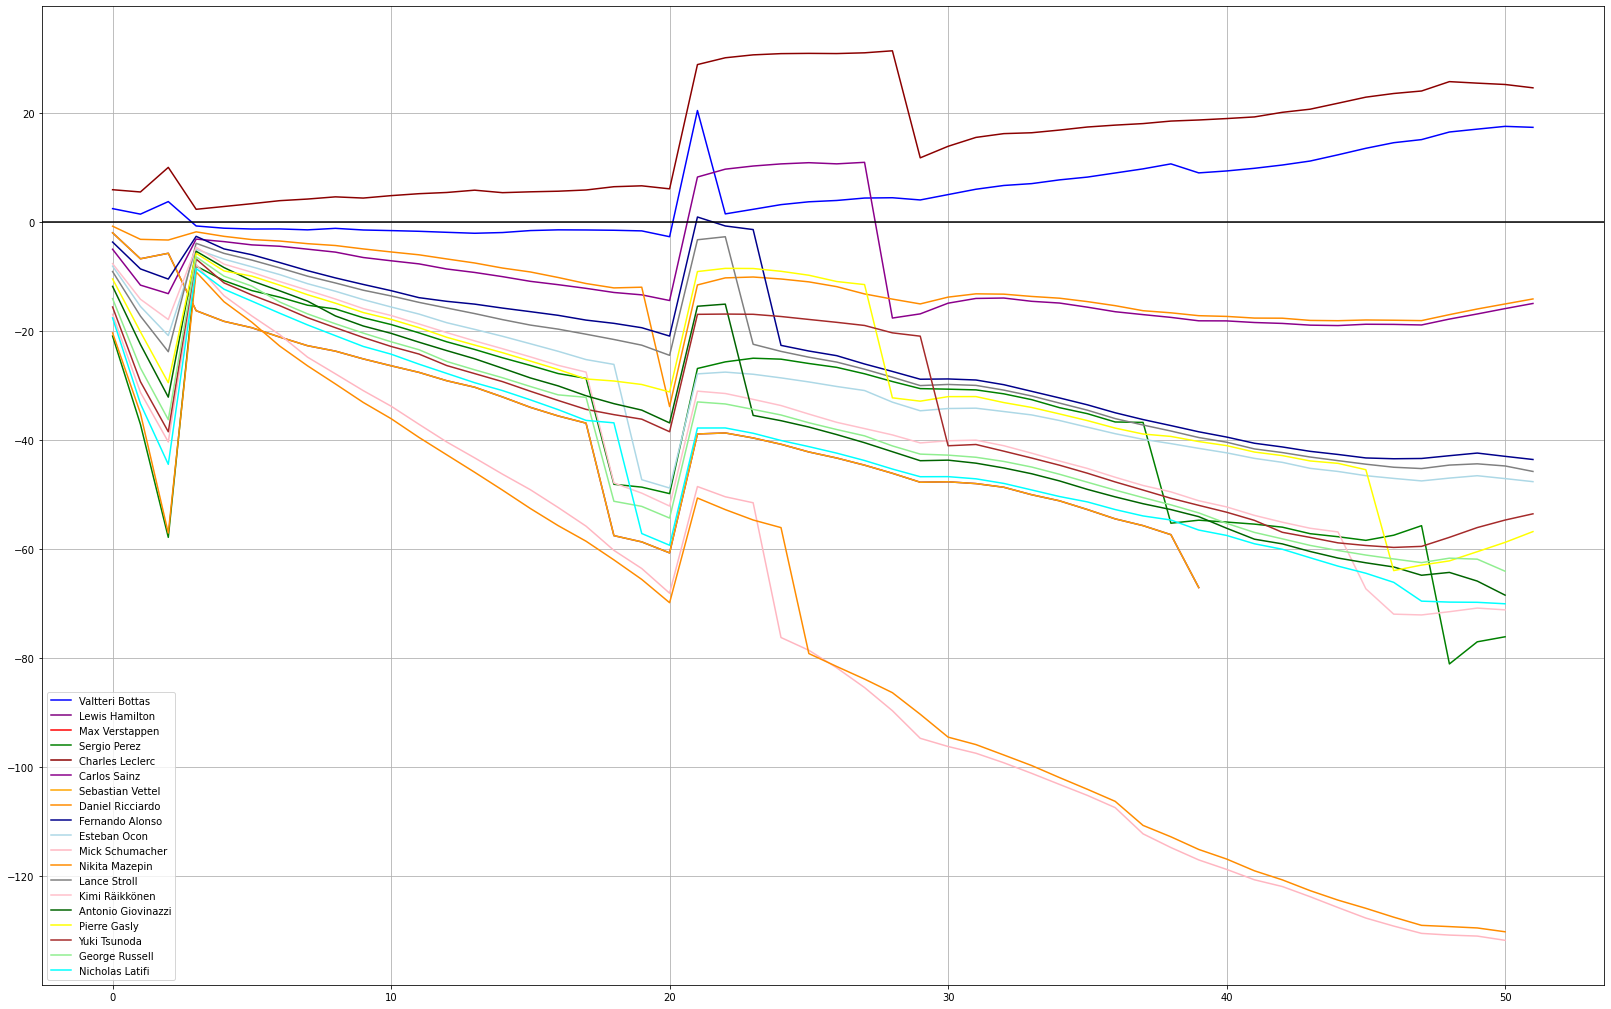

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(28,18))
plt.plot(diff['BOT'], color='blue', label='Valtteri Bottas')
plt.plot(diff['HAM'], color='purple', label='Lewis Hamilton')
plt.plot(diff['VER'], color='red', label='Max Verstappen')
plt.plot(diff['PER'], color='green', label='Sergio Perez')
plt.plot(diff['LEC'], color='darkred', label='Charles Leclerc')
plt.plot(diff['SAI'], color='darkmagenta', label='Carlos Sainz')
plt.plot(diff['VET'], color='orange', label='Sebastian Vettel')
plt.plot(diff['RIC'], color='darkorange', label='Daniel Ricciardo')
plt.plot(diff['ALO'], color='darkblue', label='Fernando Alonso')
plt.plot(diff['OCO'], color='lightblue', label='Esteban Ocon')
plt.plot(diff['MSC'], color='lightpink', label='Mick Schumacher')
plt.plot(diff['MAZ'], color='darkorange', label='Nikita Mazepin')
plt.plot(diff['STR'], color='gray', label='Lance Stroll')
plt.plot(diff['RAI'], color='pink', label='Kimi Räikkönen')
plt.plot(diff['GIO'], color='darkgreen', label='Antonio Giovinazzi')
plt.plot(diff['GAS'], color='yellow', label='Pierre Gasly')
plt.plot(diff['TSU'], color='brown', label='Yuki Tsunoda')
plt.plot(diff['RUS'], color='lightgreen', label='George Russell')
plt.plot(diff['LAT'], color='cyan', label='Nicholas Latifi')
plt.axhline(0, color='black')
plt.grid()
plt.legend()
plt.show()
plt.clf()

In [27]:
def cumulative_time(data):
    cumulative = 0
    diff = 0
    total_time = []
    total_diff = []
    
    for x in data['timedelta']:
        cumulative+=x
        total_time.append(cumulative)
    
    if len(ver_lap)<len(total_time):
        for x in range(len(ver_lap),len(total_time)):
            total_time.remove(total_time[-1])
            
    
    for i in range(len(total_time)):
        diff = ver_lap[i]-total_time[i]
        total_diff.append(diff)
        
    if len(total_diff)<len(ver_lap):
        for x in range(len(total_diff),len(ver_lap)):
            total_diff.append(np.nan)
        
    return total_diff

In [28]:
brit = lap_times_2021[lap_times_2021['name'] == 'British Grand Prix']
cumulative = 0
ver_lap=[]

for x in brit[brit['code']=='NOR']['timedelta']:
    cumulative+=x
    ver_lap.append(cumulative)

diff = pd.DataFrame()
diff['BOT'] = cumulative_time(brit[brit['code']=='BOT'])
diff['HAM'] = cumulative_time(brit[brit['code']=='VET'])
diff['NOR'] = cumulative_time(brit[brit['code']=='NOR'])
diff['PER'] = cumulative_time(brit[brit['code']=='PER'])
diff['LEC'] = cumulative_time(brit[brit['code']=='LEC'])
diff['SAI'] = cumulative_time(brit[brit['code']=='SAI'])
diff['VET'] = cumulative_time(brit[brit['code']=='VET'])
diff['RIC'] = cumulative_time(brit[brit['code']=='RIC'])
diff['ALO'] = cumulative_time(brit[brit['code']=='ALO'])
diff['OCO'] = cumulative_time(brit[brit['code']=='OCO'])
diff['MSC'] = cumulative_time(brit[brit['code']=='MSC'])
diff['MAZ'] = cumulative_time(brit[brit['code']=='MAZ'])
diff['STR'] = cumulative_time(brit[brit['code']=='STR'])
diff['RAI'] = cumulative_time(brit[brit['code']=='RAI'])
diff['GIO'] = cumulative_time(brit[brit['code']=='GIO'])
diff['GAS'] = cumulative_time(brit[brit['code']=='GAS'])
diff['TSU'] = cumulative_time(brit[brit['code']=='TSU'])
diff['RUS'] = cumulative_time(brit[brit['code']=='RUS'])
diff['LAT'] = cumulative_time(brit[brit['code']=='LAT'])

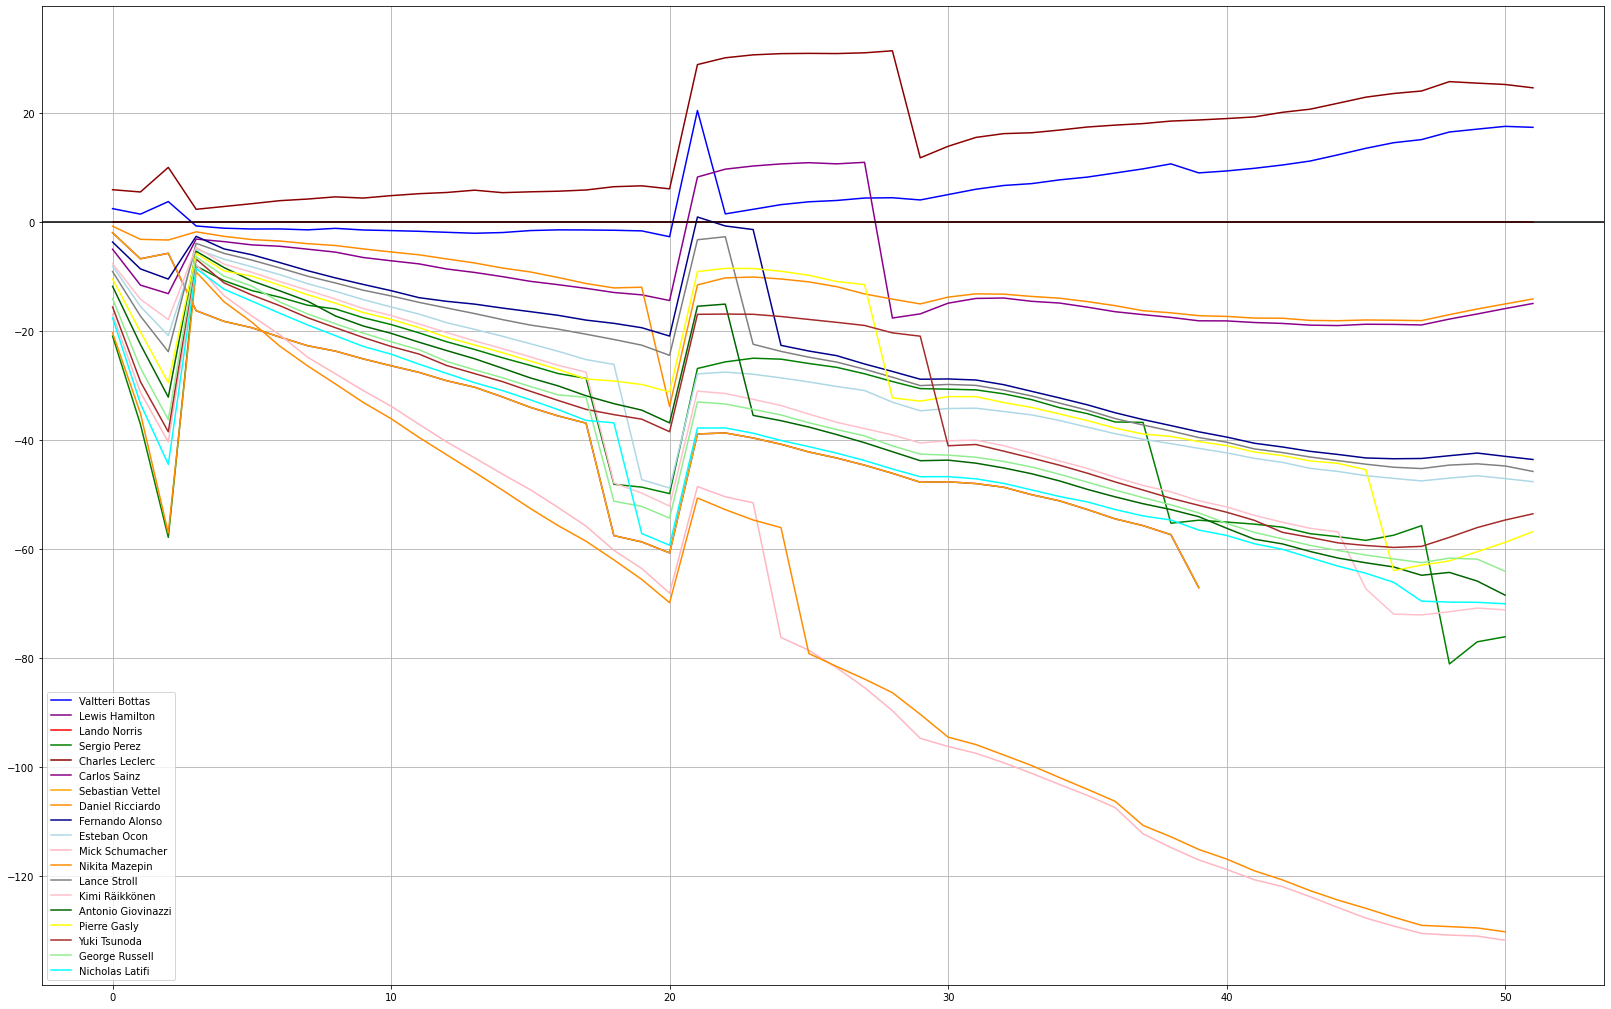

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(28,18))
plt.plot(diff['BOT'], color='blue', label='Valtteri Bottas')
plt.plot(diff['HAM'], color='purple', label='Lewis Hamilton')
plt.plot(diff['NOR'], color='red', label='Lando Norris')
plt.plot(diff['PER'], color='green', label='Sergio Perez')
plt.plot(diff['LEC'], color='darkred', label='Charles Leclerc')
plt.plot(diff['SAI'], color='darkmagenta', label='Carlos Sainz')
plt.plot(diff['VET'], color='orange', label='Sebastian Vettel')
plt.plot(diff['RIC'], color='darkorange', label='Daniel Ricciardo')
plt.plot(diff['ALO'], color='darkblue', label='Fernando Alonso')
plt.plot(diff['OCO'], color='lightblue', label='Esteban Ocon')
plt.plot(diff['MSC'], color='lightpink', label='Mick Schumacher')
plt.plot(diff['MAZ'], color='darkorange', label='Nikita Mazepin')
plt.plot(diff['STR'], color='gray', label='Lance Stroll')
plt.plot(diff['RAI'], color='pink', label='Kimi Räikkönen')
plt.plot(diff['GIO'], color='darkgreen', label='Antonio Giovinazzi')
plt.plot(diff['GAS'], color='yellow', label='Pierre Gasly')
plt.plot(diff['TSU'], color='brown', label='Yuki Tsunoda')
plt.plot(diff['RUS'], color='lightgreen', label='George Russell')
plt.plot(diff['LAT'], color='cyan', label='Nicholas Latifi')
plt.axhline(0, color='black')
plt.grid()
plt.legend()
plt.show()
plt.clf()

In [30]:
status

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
134,137,Damage
135,138,Debris
136,139,Illness
137,140,Undertray


In [31]:
results = results.drop(['time', 'milliseconds', 'points', 'fastestLapTime', 'fastestLapSpeed'], axis = 1)
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,laps,fastestLap,rank,statusId
0,1,18,1,1,22,1,1,1,1,58,39,2,1
1,2,18,2,2,3,5,2,2,2,58,41,3,1
2,3,18,3,3,7,7,3,3,3,58,41,5,1
3,4,18,4,4,5,11,4,4,4,58,58,7,1
4,5,18,5,1,23,3,5,5,5,58,43,1,1


In [32]:
drivers['driverName'] = drivers['forename'] + ' ' + drivers['surname']
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,driverName
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen


In [33]:
# races
# races.head()
# races.columns = ['raceId','year','round','circuitId','raceName','date','time','raceUrl']
# races.head()
# races = races.drop(['fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time','quali_date','quali_time','sprint_date','sprint_time'], axis = 2)
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [34]:
all_results = pd.merge(results, races, on ='raceId', how ='left')
all_results = pd.merge(all_results, circuits, on ='circuitId', how ='left')
all_results = pd.merge(all_results, drivers, on ='driverId', how ='left')
all_results = pd.merge(all_results, status, on ='statusId', how ='left')
all_results = pd.merge(all_results, constructors, on ='constructorId', how ='left')

all_results.head()

<ipython-input-34-57f7f72219fd>:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'url_x'} in the result is deprecated and will raise a MergeError in a future version.
  all_results = pd.merge(all_results, constructors, on ='constructorId', how ='left')


,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,laps,...,surname,dob,nationality_x,url_x,driverName,status,constructorRef,name,nationality_y,url_y
0,1,18,1,1,22,1,1,1,1,58,...,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton,Finished,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,18,2,2,3,5,2,2,2,58,...,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld,Finished,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,18,3,3,7,7,3,3,3,58,...,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg,Finished,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,18,4,4,5,11,4,4,4,58,...,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso,Finished,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,18,5,1,23,3,5,5,5,58,...,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen,Finished,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


In [35]:



all_results.rename(columns = {'name_y': 'constructor_name', 'name_x': 'circuit_name'}, inplace=True)
all_results.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,laps,...,surname,dob,nationality_x,url_x,driverName,status,constructorRef,name,nationality_y,url_y
0,1,18,1,1,22,1,1,1,1,58,...,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton,Finished,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,18,2,2,3,5,2,2,2,58,...,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld,Finished,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,18,3,3,7,7,3,3,3,58,...,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg,Finished,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,18,4,4,5,11,4,4,4,58,...,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso,Finished,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,18,5,1,23,3,5,5,5,58,...,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen,Finished,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


In [36]:
circuit_races = pd.merge(races, circuits, on ='circuitId', how ='left')
circuit_races = circuit_races[['raceId', 'year', 'circuitId', 'circuitRef', 'location', 'country']]

circuit_races

,raceId,year,circuitId,circuitRef,location,country
0,1,2009,1,albert_park,Melbourne,Australia
1,2,2009,2,sepang,Kuala Lumpur,Malaysia
2,3,2009,17,shanghai,Shanghai,China
3,4,2009,3,bahrain,Sakhir,Bahrain
4,5,2009,4,catalunya,Montmeló,Spain
...,...,...,...,...,...,...
1074,1092,2022,22,suzuka,Suzuka,Japan
1075,1093,2022,69,americas,Austin,USA
1076,1094,2022,32,rodriguez,Mexico City,Mexico
1077,1095,2022,18,interlagos,São Paulo,Brazil


In [37]:
finished_df = all_results.loc[all_results['statusId'].isin([1, 11, 12, 13, 14, 15, 16, 17, 18, 19])]

# Percentage of drivers finishing a race in all of F1 history
finish_pc = round((finished_df.shape[0] / all_results.shape[0]) * 100, 3)

print(f"In all of F1 history, only {finish_pc}% drivers have finished a Grand Prix that they started")

In all of F1 history, only 54.84% drivers have finished a Grand Prix that they started


In [38]:
m_dnf_lst = [5, 6, 7, 8, 9, 10, 21, 22, 23, 24, 25, 26, 30, 31, 32, 33, 34, 51, 56, 129, 121, 126, 131, 132, 135]
m_dnf_lst.extend(range(36, 45))
m_dnf_lst.extend(range(46, 50))
m_dnf_lst.extend(range(61, 111))


m_dnf_lst = [i for i in m_dnf_lst if i not in [62, 68, 73, 77, 78, 81, 82, 88, 89, 90, 92, 93, 96, 97, 100, 107]]

In [39]:
mdnf_df = all_results.loc[all_results['statusId'].isin(m_dnf_lst)]

mdnf_df.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,laps,...,surname,dob,nationality_x,url_x,driverName,status,constructorRef,name,nationality_y,url_y
6,7,18,7,5,14,17,7,7,7,55,...,Bourdais,1979-02-28,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...,Sébastien Bourdais,Engine,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
7,8,18,8,6,1,15,8,8,8,53,...,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...,Kimi Räikkönen,Engine,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
10,11,18,11,8,18,19,\N,R,11,32,...,Sato,1977-01-28,Japanese,http://en.wikipedia.org/wiki/Takuma_Sato,Takuma Sato,Transmission,super_aguri,Super Aguri,Japanese,http://en.wikipedia.org/wiki/Super_Aguri_F1
11,12,18,12,4,6,20,\N,R,12,30,...,Piquet Jr.,1985-07-25,Brazilian,"http://en.wikipedia.org/wiki/Nelson_Piquet,_Jr.",Nelson Piquet Jr.,Clutch,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
12,13,18,13,6,2,4,\N,R,13,29,...,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa,Felipe Massa,Engine,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari


In [40]:
mdnf_df['status'].value_counts()

Engine            2005
Gearbox            804
Suspension         431
Transmission       321
Electrical         315
                  ... 
Crankshaft           1
Engine fire          1
CV joint             1
Launch control       1
Brake duct           1
Name: status, Length: 72, dtype: int64

In [41]:
import plotly.express as px
dnfs_per_year = mdnf_df['year'].value_counts().reset_index().sort_values(by='index').rename(columns={'index': 'year', 'year': 'count'})

# Plotting the number of mechanical DNFs over the years
fig = px.bar(dnfs_per_year, x="year", y="count", title = 'Number of mechanical DNFs per year', color_continuous_scale=px.colors.sequential.Viridis[::-1])

fig.show()

In [42]:
drivers_per_year = all_results.groupby(['year'])['driverName'].nunique().reset_index().rename(columns={'driverName': 'numDrivers'})
dnfs_per_year['numDrivers'] = drivers_per_year['numDrivers']

dnfs_per_year['dnfs_per_driver'] = (dnfs_per_year['count']/dnfs_per_year['numDrivers']).round(3)
dnfs_per_year

,year,count,numDrivers,dnfs_per_driver
53,1950,62,24,2.583
43,1951,76,35,2.171
42,1952,77,37,2.081
25,1953,106,52,2.038
29,1954,93,36,2.583
...,...,...,...,...
62,2018,47,25,1.880
69,2019,30,20,1.500
70,2020,29,23,1.261
71,2021,26,21,1.238


In [43]:
fig = px.bar(dnfs_per_year, x = 'year', y = 'dnfs_per_driver', title = 'Number of mechanical DNFs per driver per year', 
             color_continuous_scale=px.colors.sequential.Viridis[::-1], labels = dict(year = 'Year', dnfs_per_driver = 'Mechanical DNFs per driver'))


fig.show()

In [44]:
# df_drivers1 = "drivers.csv"
# drivers1 = pd.read_csv(df_drivers1)
# df_races1 = "races.csv"
# races1 = pd.read_csv(df_races1)
# df_results1 = "results.csv"
# results1 = pd.read_csv(df_results1)
# df_sprint1 = "sprint_results.csv"
# sprint1 = pd.read_csv(df_sprint1)
# df_lap_times1 = "lap_times.csv"
# lap_times1 = pd.read_csv(df_lap_times1)
# df_circuits1 = "circuits.csv"
# circuits1 = pd.read_csv(df_circuits1)
# df_status1 = "status.csv"
# status1 = pd.read_csv(df_status1)
# df_constructors1 = 'constructors.csv'
# constructors1 = pd.read_csv(df_constructors1)
# df_drivers_standings1 = 'driver_standings.csv'
# drivers_standings1 = pd.read_csv(df_drivers_standings1)

# con1 = pd.merge(results1, races1, on ='raceId')
# con2 = pd.merge(con1, drivers1, on = 'driverId')
# con3 = pd.merge(con2, drivers_standings1, on = 'driverId')
# con4 = pd.merge(con3, constructors1, on ='constructorId')
# df = pd.merge(con4, status1, on ='statusId')
# pd.get_option("display.max_columns",None)
# df.head()


In [45]:
# df = df.drop(['url','url_x','position_x','fastestLapTime','positionText_x','time_x','time_y','driverRef',
#               'constructorRef','nationality_y','url_y','positionText_y','raceId_y','points_y'],1)

In [46]:
# col_name = {'number_x':'number','milliseconds':'timetaken_in_millisec','fastestLapSpeed':'max_speed',
#  'name_x':'grand_prix','number_y':'driver_num','code':'driver_code','nationality_x':'nationality','name_y':'company',
#  'raceId_x':'racerId','points_x':'points','position_y':'position'}

# df.rename(columns=col_name,inplace=True)
# df.head()

In [47]:
# df['driver_name'] = df['forename']+' '+df['surname']

In [48]:
# df = df.drop(['forename','surname'],1)

In [49]:
# x = df.drop('driver_name',1)
# y = df.driver_name
# from sklearn.model_selection import train_test_split
# xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [50]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import SGDClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# from sklearn import tree

In [51]:
# clf = DecisionTreeClassifier(max_depth=5,random_state=1234)
# clf.fit(xtrain, ytrain)

In [52]:
# tree.export_text(clf)

In [53]:
# fn = list(df.columns)
# fn.remove('driver_name')

In [54]:

# fig = plt.figure(figsize=(40,40))
# _ = tree.plot_tree(clf,
#                feature_names=fn,
#                filled=True)

In [55]:
# lr = LogisticRegression(solver='sag')
# dt = DecisionTreeClassifier()
# rn = RandomForestClassifier()
# knn = KNeighborsClassifier()
# gb = GaussianNB()
# sgd = SGDClassifier()

In [56]:
# li = [lr,sgd,knn,gb,rn,dt]
# d = {}
# for i in li:
#     i.fit(xtrain,ytrain)
#     ypred = i.predict(xtest)
#     print(i,":",accuracy_score(ypred,ytest)*100)
#     d.update({str(i):i.score(xtest,ytest)*100})

In [57]:
# plt.figure(figsize=(15, 6))
# plt.title("Algorithm vs Accuracy", fontweight='bold')
# plt.xlabel("Algorithm")
# plt.ylabel("Accuracy")
# plt.plot(d.keys(),d.values(),marker='o',color='plum',linewidth=4,markersize=13,
#          markerfacecolor='gold',markeredgecolor='slategray')
# plt.show()